In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trade = pd.read_csv("cashewprep.csv")
trade['Quantity'] = trade['Quantity']/1000 

The Data:
The initial dataset was downloaded from kaggle.com. It contains international trade statistics for the HS code 080310, also known as cashew nuts. The file contains the country or area, year, comm. code, flow, trade value in USD, and quantity in kg. Above, the initialy quanitity is divided by 1000 to convert the values to metric tons or 'MT'.

Cashew nuts come in two forms. The can be in the shell, which is referred to as raw cashew nut, or 'RCN'. The other form is without the shell, or cashew kernel. Both forms are reported under the same code, even though cashew kernels are about 22-25% the weight of a nut in the shell. (It takes 4.5 kg of RCN to make 1 kg of kernel) After some general research on the flow of raw cashew and cashew kernels,https://bencoleman.me/portfolio/aca-world-map, it turns out that this indistinction poses a challange to producing meaningful insight. For example, Benin and Viet Nam would show up on the same export graph, even though they export different forms of cashew. To control for these types of distortions, the information obtained is assumed to be accurate and the dataset is reduced to RCN exporters, RCN importers, and kernel exporters.

In [3]:
print(trade['Country or Area'].unique())

['Benin' 'Brazil' 'Burkina Faso' 'Cambodia' "Côte d'Ivoire" 'Gambia'
 'Ghana' 'Guinea' 'India' 'Indonesia' 'Mozambique' 'Nigeria' 'Togo'
 'United Rep. of Tanzania' 'Viet Nam']


Question 1. Where does cashew come from? Who are the main players in the market?

First, separate the RCN exporters from the RCN importers, and exclude Brazil, India and Viet Nam (they export kernel not RCN). Then look at 2016  to get a general idea of the RCN trade. 

In [24]:
exports = trade.loc[trade['Flow'] == 'Export'] 
exports = exports.loc[exports['Country or Area'] != 'India']
exports = exports.loc[exports['Country or Area'] != 'Viet Nam']
exports = exports.loc[exports['Country or Area'] != 'Brazil']

To generate a clean pie chart of the exports in 2016, sum the exports of countries who export less than 5% total and regroup as 'Other'.

In [17]:
pie1 = pd.DataFrame()
pie1['labels'] = exports.loc[exports['Year'] == 2016, 'Country or Area']
pie1['quantity'] = exports.loc[exports['Year'] == 2016, 'Quantity']
pie1['pctofw'] = pie1.quantity/sum(pie1.quantity)
pie2 = pie1.loc[pie1['pctofw'] >= .05]
pie3 = pie1.loc[pie1['pctofw'] <= .05]
pie2.loc['6'] = ['Other', sum(pie3['quantity']), sum(pie3['pctofw'])]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


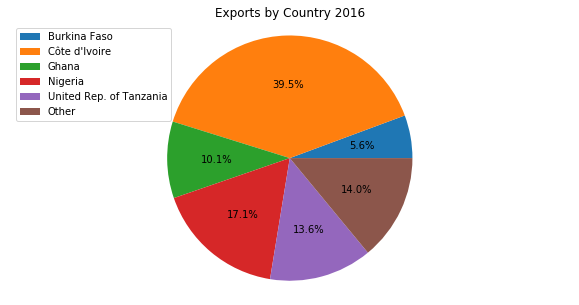

In [19]:
#Generate the Exporters Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(pie2.quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Exports by Country 2016')
plt.legend(pie2['labels'])

plt.show()

From this information pie chart it is clear that Cote D'Ivoire is the world's largest exporter of RCN with a 40% share of world exports. Using this information plus the research from before, it can be deduced that Cote D'Ivoire makes up almost 20% of world cashew production.  Also noteworthy is that the top five exporters of RCN make up over 85% of total exports and are all on the African contintent. Next, look at the same pie graph for the importers of RCN.

In [21]:
imports = trade.loc[trade['Flow'] == 'Import']

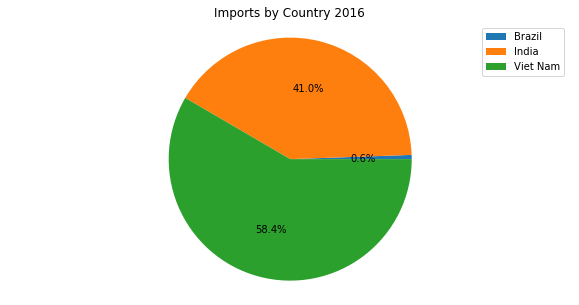

In [22]:
#Generate the Importers pie chart
plt.figure(figsize=(10, 5))
plt.pie(imports.loc[imports['Year'] == 2016, 'Quantity'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Imports by Country 2016')
plt.legend(imports.loc[imports['Year'] == 2016, 'Country or Area'])
plt.show()

There are only two significant markets for RCN. Viet Nam is the top exporter with 58.4% of total imports.

Question 2. Has it always been this way? What are some of the trends in recent history?

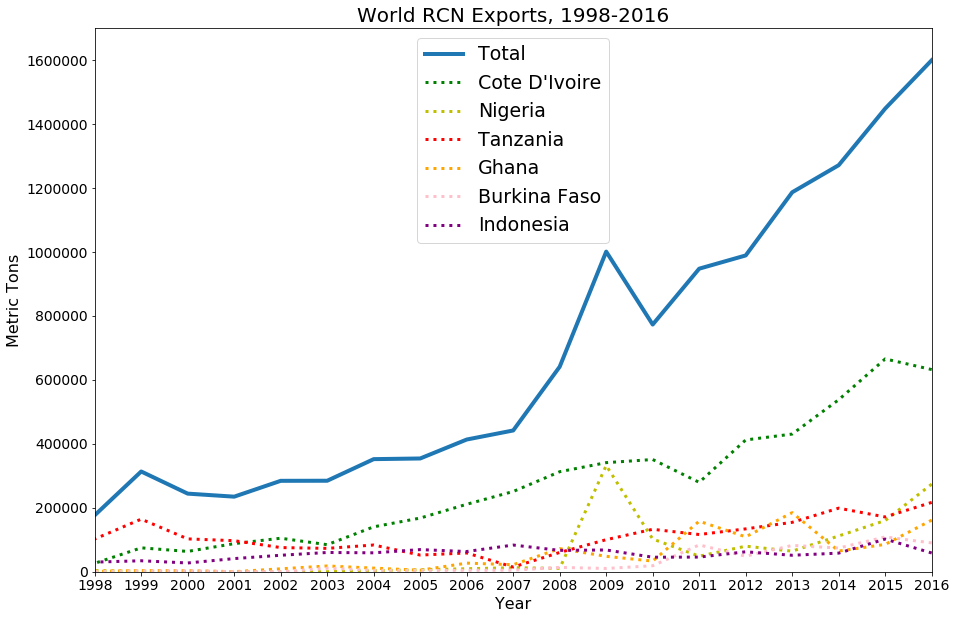

In [26]:
#Start by isolating each exporter
ivc = exports.loc[exports['Country or Area'] == "Côte d'Ivoire"]
ngr = exports.loc[exports['Country or Area'] == 'Nigeria']
tzn = exports.loc[exports['Country or Area'] == 'United Rep. of Tanzania']
gha = exports.loc[exports['Country or Area'] == 'Ghana']
bkf = exports.loc[exports['Country or Area'] == 'Burkina Faso']
indo = exports.loc[exports['Country or Area'] == 'Indonesia']
# Total Exports
exp_by_year = exports.groupby(exports['Year'])['Quantity'].sum()
#Plot the countries
plt.figure(figsize=(15,10))
plt.plot(exp_by_year, label='Total', linewidth=4)
plt.plot(ivc['Year'], ivc['Quantity'], label="Cote D'Ivoire", color='g', linestyle='dotted', linewidth=3)
plt.plot(ngr['Year'], ngr['Quantity'], label='Nigeria', color='y', linestyle='dotted', linewidth=3)
plt.plot(tzn['Year'], tzn['Quantity'], label='Tanzania', color='r', linestyle='dotted', linewidth=3)
plt.plot(gha['Year'], gha['Quantity'], label='Ghana', color='orange', linestyle='dotted', linewidth=3)
plt.plot(bkf['Year'], bkf['Quantity'], label='Burkina Faso', color='pink', linestyle='dotted', linewidth=3)
plt.plot(indo['Year'], indo['Quantity'], label='Indonesia', color='purple', linestyle='dotted', linewidth=3)
#Options
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 1700000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,1700000)
plt.xlim(1998,2016)
plt.title('World RCN Exports, 1998-2016', fontsize=20)

plt.show()


This graph shows world RCN exports. There is a clear uptrend in cashew production. Before 2001, Tanzania was the top exporter at less than 200,000 MT/year. After 2001, Cote D’Ivoire’s production increasingly dwarfed the rest of the African continent, reaching total exports of 635,000 MT in 2015.

Perhaps there is a ‘bumper’ crop every 10 years or so. (1998-1999 and 2008-2009).

Do the same for RCN importers.

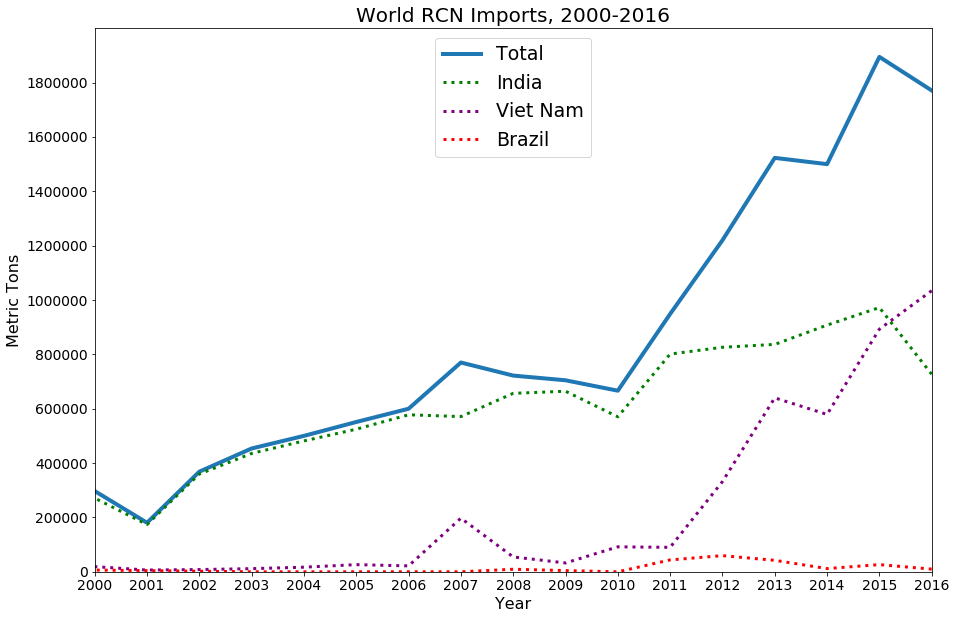

In [29]:
#Isolate country data
ind = imports.loc[imports['Country or Area'] == 'India'] #India
viet = imports.loc[imports['Country or Area'] == 'Viet Nam']#Viet Nam
brz = imports.loc[imports['Country or Area'] == 'Brazil']
imp_by_year = imports.groupby(imports['Year'])['Quantity'].sum()
#Plot importers
plt.figure(figsize=(15,10))
plt.plot(imp_by_year, label='Total', linewidth=4)
plt.plot(ind['Year'], ind['Quantity'], label='India', color='green', linestyle='dotted', linewidth=3)
plt.plot(viet['Year'], viet['Quantity'], label='Viet Nam', color='purple', linestyle='dotted', linewidth=3)
plt.plot(brz['Year'], brz['Quantity'], label='Brazil', color='red', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1997, 2017, 1),fontsize=14)
plt.yticks(range(0, 2000000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,2000000)
plt.xlim(2000,2016)
plt.title('World RCN Imports, 2000-2016', fontsize=20)

plt.show()

This graph tells a drastically different story than the snap shot of 2016. It looks like until the end of 2005, India imported almost all the RCN. But the following year Viet Nam comes online, effectively reversing the trend direction of India’s imports. In the following decade Viet Nam would become the primary driver of world imports, eventually displacing India as the top importer.

This is a lot of RCN moving across the globe. What happens to it? What does these countries do with all the RCN?
Plot kernel exports.


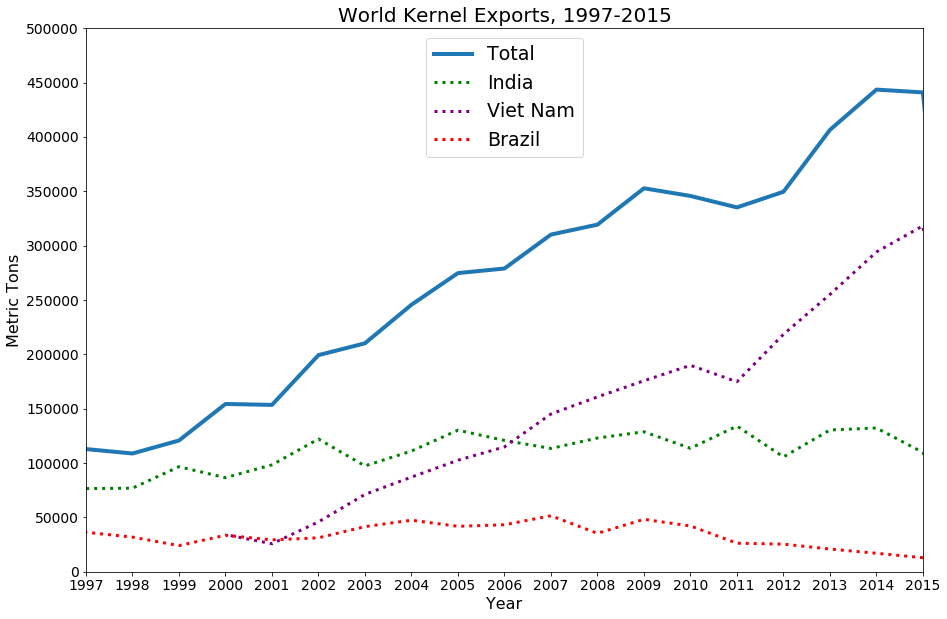

In [31]:
kexports = trade.loc[trade['Flow'] == 'Export'] 
indk = kexports.loc[kexports['Country or Area'] == 'India'] 
vietk = kexports.loc[kexports['Country or Area'] == 'Viet Nam']
brzk = kexports.loc[kexports['Country or Area'] == 'Brazil']
kexporters = pd.concat([brzk, indk, vietk])
k_by_year = kexporters.groupby(kexporters['Year'])['Quantity'].sum()
#Generate the plot
plt.figure(figsize=(15,10))
plt.plot(k_by_year, label='Total', linewidth=4)
plt.plot(indk['Year'], indk['Quantity'], label='India', color='green', linestyle='dotted', linewidth=3)
plt.plot(vietk['Year'], vietk['Quantity'], label='Viet Nam', color='purple', linestyle='dotted', linewidth=3)
plt.plot(brzk['Year'], brzk['Quantity'], label='Brazil', color='red', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1997, 2017, 1),fontsize=14)
plt.yticks(range(0, 2000000, 50000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,500000)
plt.xlim(1997,2015)
plt.title('World Kernel Exports, 1997-2015', fontsize=20)

plt.show()

This graph also shows an interesting story. While India’s RCN imports continued to climb in this time period, her kernel exports remained relatively flat for the same period.
Also remark, 2006 is the year that Viet Nam not only became aggressive in RCN imports, but also displaced India as the top kernel exporter. 
One takeaway is that cashews would be much more expensive without the emergence of Cote D’Ivoire and Viet Nam
